# Supervised Learning
Kali ini saya menggunakan supervised learning model klasifikasi digunakan untuk memprediksi kategori atau kelas berdasarkan variabel-variabel yang ada. Dalam hal ini, kita ingin mengidentifikasi faktor-faktor utama yang mempengaruhi tingkat kebahagiaan suatu negara.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# Masukkan Dataset
data = pd.read_csv('world happines report 2021.csv')
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [68]:
# Memilih variabel independen (x) dan dependen (y)
X = data[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
           'Freedom to make life choices', 'Generosity']]
y = data['Ladder score']

# Binning Ladder Score untuk klasifikasi
bins = [0, 4, 6, 8, 10]
labels = [0, 1, 2, 3]  # Menggunakan angka untuk klasifikasi
y_binned = pd.cut(y, bins=bins, labels=labels)

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

### Naive Bayes

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [89]:
# Membuat model Naive Bayes Gaussian
model_nb_gaussian = GaussianNB()
model_nb_gaussian.fit(X_train.values, np.ravel(y_train))

# Melakukan prediksi
predictions_nb_gaussian = model_nb_gaussian.predict(X_test.values)
predicted_probabilities_nb_gaussian = model_nb_gaussian.predict_proba(X_test.values)

# Menghitung akurasi model
accuracy_nb_gaussian = accuracy_score(np.ravel(y_test),predictions_nb_gaussian)
print(f'Akurasi Model Naive Bayes Gaussian: {accuracy_nb_gaussian:.2f}')

Akurasi Model Naive Bayes Gaussian: 0.67


Ini menunjukkan bahwa model Naive Bayes berhasil mengklasifikasikan tingkat kebahagiaan dengan akurasi 67%. Meskipun tidak sangat tinggi, ini menunjukkan bahwa model dapat memberikan prediksi yang cukup baik.


Confusion Matrix:
[[ 0  2  0]
 [ 3 11  4]
 [ 0  1  9]]


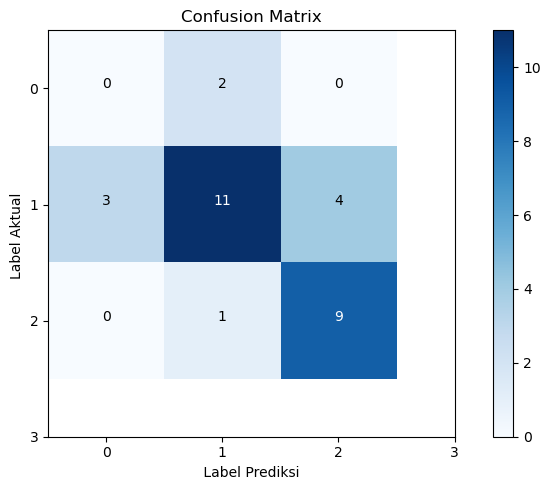

In [104]:
# Confusioan Matrix
conf_matrix_nb_gaussian = confusion_matrix(np.ravel(y_test),predictions_nb_gaussian)
print("\nConfusion Matrix:")
print(conf_matrix_nb_gaussian)

plt.figure(figsize=(8, 5))
plt.imshow(conf_matrix_nb_gaussian, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

thresh = conf_matrix_nb_gaussian.max() / 2.
for i, j in np.ndindex(conf_matrix_nb_gaussian.shape):
    plt.text(j,i , format(conf_matrix_nb_gaussian[i,j], 'd'),
             horizontalalignment="center",
             color ="white" if conf_matrix_nb_gaussian[i,j]> thresh else "black")

plt.ylabel ('Label Aktual ')
plt.xlabel (' Label Prediksi ')
plt.tight_layout ()
plt.show ()

In [96]:
# Menghitung probabilitas fitur untuk setiap kelas
probabilities = model_nb_gaussian.theta_  # Probabilitas untuk Gaussian Naive Bayes
features = X.columns

# Membuat DataFrame untuk menampilkan pengaruh variabel
influence_df_nb = pd.DataFrame(probabilities, columns=features)
influence_df_nb.index = [f'Class {i}' for i in range(len(probabilities))]
print("\nTabel Pengaruh Variabel X - Naive Bayes:")
print(influence_df_nb)


Tabel Pengaruh Variabel X - Naive Bayes:
         Logged GDP per capita  Social support  Healthy life expectancy  \
Class 0               7.823100        0.605100                56.669400   
Class 1               8.975537        0.782821                62.727269   
Class 2              10.461571        0.906905                70.275476   

         Freedom to make life choices  Generosity  
Class 0                      0.722200    0.045800  
Class 1                      0.758343   -0.012627  
Class 2                      0.868262   -0.012714  


Interpretasi:
1. Logged GDP per capita:
Kelas dengan tingkat kebahagiaan rendah (Class 0) memiliki nilai GDP per kapita terendah (7.82), sedangkan kelas tinggi (Class 2) memiliki nilai tertinggi (10.46). Ini menunjukkan bahwa pendapatan ekonomi sangat berpengaruh terhadap tingkat kebahagiaan.
2. Social support:
Nilai dukungan sosial juga meningkat seiring dengan peningkatan kelas kebahagiaan, dari sekitar 0.61 untuk Class 0 hingga 0.91 untuk Class 2. Ini menunjukkan bahwa dukungan sosial yang lebih besar berkontribusi pada tingkat kebahagiaan yang lebih tinggi.
3. Healthy life expectancy:
Harapan hidup juga meningkat dari 56.67 di Class 0 menjadi 70.28 di Class 2. Ini menegaskan bahwa kesehatan dan harapan hidup yang lebih baik berkorelasi positif dengan kebahagiaan.
4. Freedom to make life choices:
Kebebasan untuk membuat pilihan hidup juga meningkat dari Class rendah ke tinggi, menunjukkan bahwa individu merasa lebih bahagia ketika mereka memiliki kontrol atas keputusan hidup mereka.
5. Generosity:
Nilai generosity tampaknya tidak berpengaruh signifikan, bahkan menunjukkan nilai negatif pada kelas menengah dan tinggi. Ini mungkin menunjukkan bahwa faktor ini tidak sekuat faktor lainnya dalam mempengaruhi kebahagiaan.

Jadi faktor yang paling memengaruhi tingkat kebahagiaan suatu negara pada metode naive bayes urutannya yaitu pendapatan ekonomi (GDP), dukungan sosial, harapan hidup, dan kebebasan membuat pilihan. Namun variabel generosity dikatakan tidak berpengaruh pada metode ini, yang artinya sikap dermawan tidak berpengaruh pada kebahagiaan suatu negara.

### Decision Tree Classifer

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [74]:
# Membuat model Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Melakukan prediksi
predictions_dt = model_dt.predict(X_test)

# Menghitung akurasi model
accuracy_dt = accuracy_score(y_test, predictions_dt)
print(f'Akurasi Model Decision Tree Classifier: {accuracy_dt:.2f}')

Akurasi Model Decision Tree Classifier: 0.80


Model ini berhasil mengklasifikasikan tingkat kebahagiaan dengan akurasi 80%. Ini menunjukkan bahwa model cukup efektif dalam memprediksi kelas kebahagiaan berdasarkan fitur yang diberikan.


Confusion Matrix:
[[ 2  0  0]
 [ 1 13  4]
 [ 0  1  9]]


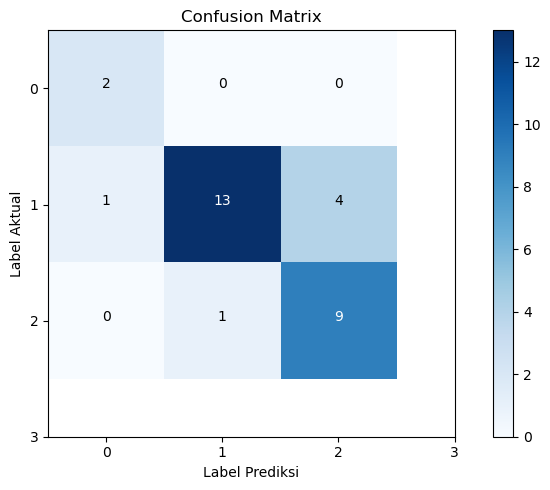

In [76]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_dt)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Label Aktual')
plt.xlabel('Label Prediksi')
plt.tight_layout()
plt.show()

In [108]:
# Tabel Pengaruh Variabel - Decision Tree
importances_dt = model_dt.feature_importances_
influence_df_dt = pd.DataFrame({
    'Variabel X': X.columns,
    'Pengaruh': importances_dt
}).sort_values(by='Pengaruh', ascending=False)

print("\nTabel Pengaruh Variabel X - Decision Tree:")
print(influence_df_dt)


Tabel Pengaruh Variabel X - Decision Tree:
                     Variabel X  Pengaruh
0         Logged GDP per capita  0.450197
1                Social support  0.189643
3  Freedom to make life choices  0.157796
4                    Generosity  0.132118
2       Healthy life expectancy  0.070246


Interpretasi:
1. Logged GDP per capita:
Memiliki pengaruh tertinggi (0.450197) di antara semua fitur. Ini menunjukkan bahwa pendapatan per kapita yang lebih tinggi sangat berkontribusi terhadap tingkat kebahagiaan suatu negara.
2. Social support:
Dengan pengaruh sebesar (0.189643), dukungan sosial juga merupakan faktor penting dalam menentukan kebahagiaan. Hal ini mencerminkan bahwa masyarakat yang memiliki jaringan sosial yang kuat cenderung lebih bahagia.
3. Freedom to make life choices:
Pengaruh sebesar (0.157796) menunjukkan bahwa kebebasan untuk membuat pilihan hidup juga berkontribusi pada tingkat kebahagiaan, mencerminkan pentingnya otonomi individu dalam kehidupan sehari-hari.
4. Generosity:
Dengan pengaruh (0.132118), sikap dermawan berkontribusi pada kebahagiaan, meskipun tidak sekuat faktor lainnya.
5. Healthy life expectancy:
Meskipun memiliki pengaruh terendah di antara fitur-fitur lainnya (0.070246), harapan hidup tetap relevan dalam konteks kesejahteraan dan kebahagiaan individu.

Jadi faktor yang paling memengaruhi tingkat kebahagiaan suatu negara pada metode decision tree classifer urutannya yaitu pendapatan ekonomi (GDP), dukungan sosial, kebebasan membuat pilihan, sikap dermawan, dan  harapan hidup. Pada metode ini variabel healthy life expectancy dikatakan memiliki pengaru paling rendah, yang artinya harapan hidup tidak terllau berpengaruh pada tingkat kebahagiaan suatu negara.

### Random Forest Classifier

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [82]:
# Membuat model Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Melakukan prediksi
predictions_rf = model_rf.predict(X_test)

# Menghitung akurasi model
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f'Akurasi Model Random Forest Classifier: {accuracy_rf:.2f}')

Akurasi Model Random Forest Classifier: 0.70


Model ini berhasil mengklasifikasikan tingkat kebahagiaan dengan akurasi 70%. Meskipun tidak setinggi model Decision Tree (80%), akurasi ini masih menunjukkan bahwa model dapat memberikan prediksi yang cukup baik.


Confusion Matrix:
[[ 0  2  0]
 [ 0 14  4]
 [ 0  3  7]]


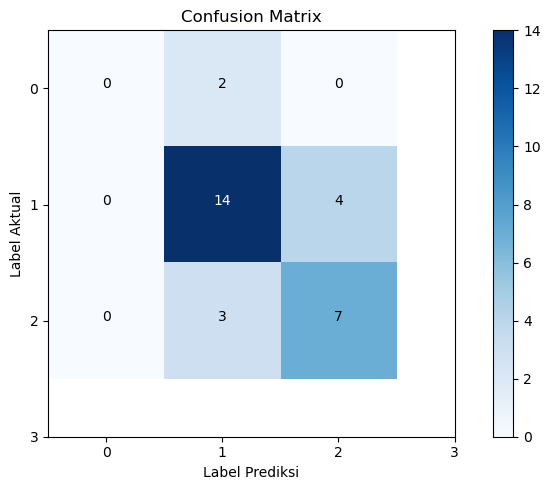

In [80]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_rf)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualisasi Matriks Kebingungan
plt.figure(figsize=(8, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Label Aktual')
plt.xlabel('Label Prediksi')
plt.tight_layout()
plt.show()

In [107]:
# Tabel Pengaruh Variabel - Random Forest
importances_rf = model_rf.feature_importances_
influence_df_rf = pd.DataFrame({
    'Variabel X': X.columns,
    'Pengaruh': importances_rf
}).sort_values(by='Pengaruh', ascending=False)

print("\nTabel Pengaruh Variabel X - Random Forest:")
print(influence_df_rf)


Tabel Pengaruh Variabel X - Random Forest:
                     Variabel X  Pengaruh
0         Logged GDP per capita  0.329349
1                Social support  0.251869
2       Healthy life expectancy  0.174758
3  Freedom to make life choices  0.141722
4                    Generosity  0.102302


Interpretasi:
1. Logged GDP per capita:
Memiliki pengaruh tertinggi (0.329349) di antara semua fitur. Ini menunjukkan bahwa pendapatan per kapita yang lebih tinggi sangat berkontribusi terhadap tingkat kebahagiaan suatu negara.
2. Social support:
Dengan pengaruh sebesar (0.251869), dukungan sosial merupakan faktor penting dalam menentukan kebahagiaan. Hal ini mencerminkan bahwa masyarakat yang memiliki jaringan sosial yang kuat cenderung lebih bahagia.
3. Healthy life expectancy:
Pengaruh sebesar (0.174758) menunjukkan bahwa harapan hidup yang lebih tinggi berkorelasi positif dengan tingkat kebahagiaan, mencerminkan pentingnya kesehatan dalam kesejahteraan individu.
4. Freedom to make life choices:
Dengan pengaruh (0.141722), kebebasan untuk membuat pilihan hidup juga berkontribusi pada tingkat kebahagiaan, mencerminkan pentingnya otonomi individu dalam kehidupan sehari-hari.
5. Generosity:
Meskipun memiliki pengaruh terendah di antara fitur-fitur lainnya (0.102302), sikap dermawan masih berperan dalam meningkatkan kebahagiaan, meskipun tidak sekuat faktor lainnya.

Jadi faktor yang paling memengaruhi tingkat kebahagiaan suatu negara pada metode decision tree classifer urutannya yaitu pendapatan ekonomi (GDP), dukungan sosial, harapan hidup, kebebasan membuat pilihan, dan sikap dermawan. Pada metode ini semua variabel berpengaruh pada tingkat kebahagiaan suatu negara.

### Support Vector Machine (SVM)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [85]:
# Membuat model Support Vector Machine (SVM)
model_svm = SVC(kernel='linear', random_state=42)  # Menggunakan kernel linear
model_svm.fit(X_train, y_train)

# Melakukan prediksi
predictions_svm = model_svm.predict(X_test)

# Menghitung akurasi model
accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f'Akurasi Model Support Vector Machine: {accuracy_svm:.2f}')

Akurasi Model Support Vector Machine: 0.73



Confusion Matrix:
[[ 0  2  0]
 [ 0 15  3]
 [ 0  3  7]]


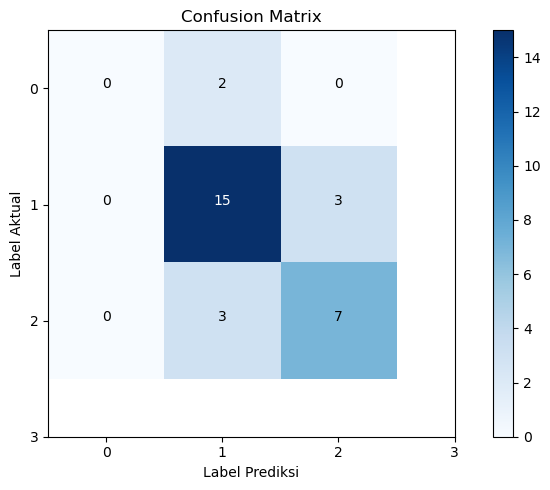

In [86]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_svm)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualisasi Matriks
plt.figure(figsize=(8, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Label Aktual')
plt.xlabel('Label Prediksi')
plt.tight_layout()
plt.show()

In [109]:
# Mengambil koefisien dari model SVM jika menggunakan kernel linear
if model_svm.kernel == 'linear':
    coefficients = model_svm.coef_[0]
    influence_df_svm = pd.DataFrame({
        'Variabel X': X.columns,
        'Koefisien': coefficients,
        'Pengaruh': np.abs(coefficients)  # Nilai absolut koefisien sebagai ukuran pengaruh
    }).sort_values(by='Pengaruh', ascending=False)

    print("\nTabel Pengaruh Variabel X - SVM:")
    print(influence_df_svm)


Tabel Pengaruh Variabel X - SVM:
                     Variabel X  Koefisien  Pengaruh
1                Social support  -0.273588  0.273588
3  Freedom to make life choices   0.050468  0.050468
0         Logged GDP per capita  -0.013900  0.013900
4                    Generosity   0.010114  0.010114
2       Healthy life expectancy   0.000438  0.000438


Interpretasi:
1. Social support:
Memiliki koefisien negatif (-0.273588) tetapi pengaruh absolutnya adalah yang tertinggi (0.273588). Ini menunjukkan bahwa meskipun model memperhitungkan dukungan sosial sebagai faktor penting, ada hubungan negatif yang mungkin mencerminkan bahwa dalam konteks tertentu, peningkatan dukungan sosial tidak selalu berkorelasi positif dengan kebahagiaan.
2. Freedom to make life choices:
Dengan koefisien positif (0.050468), kebebasan untuk membuat pilihan hidup juga berkontribusi pada tingkat kebahagiaan, meskipun pengaruhnya relatif kecil.
3. Logged GDP per capita:
Koefisien negatif (-0.013900) menunjukkan bahwa meskipun GDP per kapita sering dianggap sebagai faktor penting, dalam konteks ini, pengaruhnya sangat kecil dan mungkin tidak signifikan.
4. Generosity:
Juga memiliki koefisien positif (0.010114), tetapi pengaruhnya sangat rendah, menunjukkan bahwa sikap dermawan mungkin tidak menjadi faktor utama dalam mempengaruhi kebahagiaan.
5. Healthy life expectancy:
Dengan koefisien yang sangat kecil (0.000438), ini menunjukkan bahwa harapan hidup tidak memiliki pengaruh signifikan terhadap tingkat kebahagiaan dalam model ini.

Jadi faktor yang paling memengaruhi tingkat kebahagiaan suatu negara pada metode SVM urutannya yaitu dukungan sosial, kebebasan membuat pilihan, sikap dermawan, pendapatan ekonomi (GDP) dan harapan hidup. Pada metode ini variabel yang paling berpengaruh adalah variabel social support dan healthy life expectancy yang paling rendah, yang artinya dukungan sosial paling berpengatuh pada tingkat kebahagiaan suatu negara dan harapan hidup paling rendah pengaruhnya.